<center><h1> Momento de Inercia en python </h1>


<center> <h2>Jorge Luis David Mesa

<center> <h2> Alan Stiven Camacho Restrepo

Para calcular la energía cinética de un cuerpo rígido se necesita conocer el tensor de inercia $\mathcal{I}$ del cuerpo que viene dado por la siguiente expresión:

$$\mathcal{I}_{ik} = \sum m(x_{l}^2 \delta_{ik} - x_{i}x_{k})$$

Dando la expresión para la energía cinética del cuerpo como:

$$T = \frac{1}{2}MV^2 + \frac{1}{2} \mathcal{I}_{ik} \Omega_{i} \Omega_{k}$$

Donde $M$ es la masa total del cuerpo. Con esto y el potencial $U$ sometido al cuerpo, se obtiene la lagrangiana del cuerpo sólido:  $\mathcal{L} = \frac{1}{2}MV^{2} + \frac{1}{2} \mathcal{I}_{ik} \Omega_{i} \Omega_{k} - U$

El tensor $\mathcal{I}_{ik}$ tiene la siguiente forma matricial:

$$\mathcal{I}_{ik} = \begin{pmatrix} \sum m(y^2+z^2) & -\sum mxy & -\sum mxz  \\ -\sum myx &  \sum m(x^2 + z^2) & -\sum myz \\ -\sum mzx & -\sum mzy & \sum m(x^2 + y^2) \end{pmatrix}$$\
$$ = \begin{pmatrix} \mathcal{I}_{xx}  & \mathcal{I}_{xy} & \mathcal{I}_{xz}  \\ \mathcal{I}_{yx} &  \mathcal{I}_{yy} & \mathcal{I}_{yz} \\ \mathcal{I}_{zx} & \mathcal{I}_{zy} & \mathcal{I}_{zz} \end{pmatrix}$$

Donde las componentes $\mathcal{I}_{xx}$, $\mathcal{I}_{yy}$ y $\mathcal{I}_{zz}$ son los momentos de inercia del cuerpo rígido correspondiente.

El tensor de inercia puede reducirse a forma diagonal por una elección apropiada de los ejes $x_{1}, x_{2},x_{3}$ llamados los _ejes principales de inercia_, y los valores correspondientes a las entradas de la diagonal se llaman _momentos principales de inercia_

Un cuerpo cuyos tres momentos principales de inercia son distintos se llama _peonza asimétrica_. Si dos de estos momentos son iguales, es decir $I_{xx} = I_{yy} \neq I_{zz}$ se llamará al cuerpo una _peonza simétrica_ y si los tres momentos principales de inercia son iguales ($I_{xx} = I_{yy} = I_{zz}$) se le llama _peonza esférica_.

Por lo tanto, a través de la teoría expuesta por $[1]$ se calcularán númericamente el tensor de inercia para distintas figuras que tengan simetría y no tengan para analizar sus momentos de inercia. 

In [ ]:
#IMPORTANDO LAS LIBRERÍAS NECESARIAS

import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import dblquad     
from scipy.integrate import tplquad
import pandas as pd
from numpy import linalg as LA

Para las distintas figuras usadas se cargan los archivos o matrices en formato `.txt` que contienen la información de las coordenadas de cada punto de la figura. 

<CENTER><h1>1. TOROIDE

In [ ]:
coords = np.loadtxt('torus_150x42x150.txt', unpack=True, delimiter=',', dtype=int)
coords[[1, 2]] = coords[[2, 1]]
coords = coords/max(coords.ravel())
x,y,z  = coords[0],coords[1],coords[2] 
#coords = x,y,z

In [ ]:
x_mean, y_mean = np.mean(x), np.mean(y)
z_max = max(z)                                                     
P0 = x0, y0, z0 = x_mean, y_mean, z_max
x, y, z = coords[0] - x0,coords[1] - y0,coords[2] - z0      #SE CENTRAN LAS FIGURAS EN EL ORIGEN COORDENADO

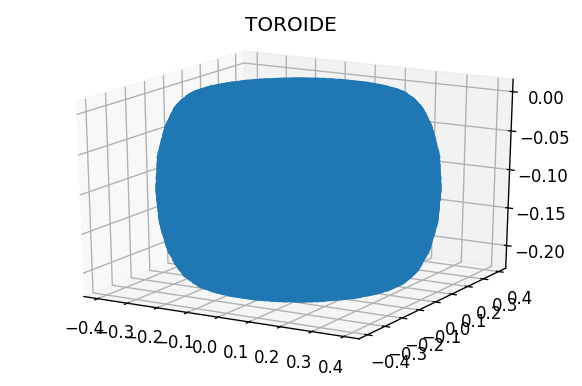

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('TOROIDE')
ax.scatter(x,y,z)
ax.view_init(elev=20)

Considerando los cuerpos homogéneos y la expresión del tensor de forma matricial:



$$\mathcal{I}_{ik} = \begin{pmatrix} \sum m(y^2+z^2) & -\sum mxy & -\sum mxz  \\ -\sum myx &  \sum m(x^2 + z^2) & -\sum myz \\ -\sum mzx & -\sum mzy & \sum m(x^2 + y^2) \end{pmatrix} = \begin{pmatrix} \mathcal{I}_{x}  & \mathcal{I}_{xy} & \mathcal{I}_{xz}  \\ \mathcal{I}_{yx} &  \mathcal{I}_{y} & \mathcal{I}_{yz} \\ \mathcal{I}_{zx} & \mathcal{I}_{zy} & \mathcal{I}_{z} \end{pmatrix}$$

Se pasan a cacular númericamente cada entrada del tensor.

In [ ]:
N = coords.shape[1]
Ix = sum(coords[1]**2 + coords[2]**2)/N
Iy = sum(coords[0]**2 + coords[2]**2)/N
Iz = sum(coords[0]**2 + coords[1]**2)/N
Ixy = sum(coords[0]*coords[1])/N
Iyz = sum(coords[1]*coords[2])/N
Ixz = sum(coords[0]*coords[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.21826224, 0.15214042, 0.04186451],
       [0.15214042, 0.21826224, 0.04186451],
       [0.04186451, 0.04186451, 0.40098198]])

Con la librería `pandas` se imprime el tensor de forma visual para mejor comprensión. 

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.218262,0.152140,0.041865
1,0.152140,0.218262,0.041865
2,0.041865,0.041865,0.400982


A través de los valores del tensor obtenido númericamente se obtuvo para el toroide las siguientes características:

$$I_{x} = I_{y} \neq I_{z} $$

Diciendonós que el cuerpo es una _peonza simétrica_
Con los ejes coordenados dados por los ejes en la figura (eje coordenado usual $x-y-z$)

<CENTER><h1>2. TROMPO

In [ ]:
coords1 = np.loadtxt('text.txt', unpack=True, delimiter=',', dtype=int)
coords1[[1, 2]] = coords1[[2, 1]]
coords1 = coords1/max(coords1.ravel())
x1,y1,z1  = coords1[0],coords1[1],coords1[2] 
#coords = x,y,z

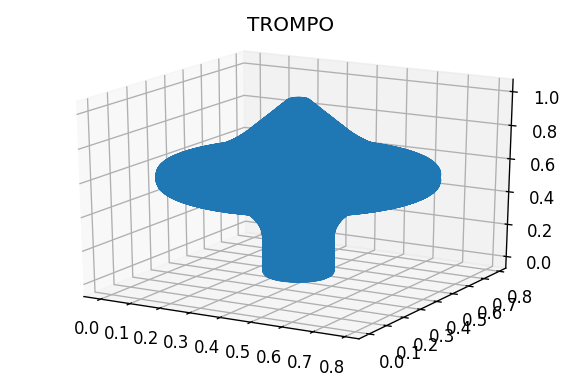

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('TROMPO')
ax.scatter(x1,y1,z1)
ax.view_init(elev=20)

In [ ]:
N = coords1.shape[1]
Ix = sum(coords1[1]**2 + coords1[2]**2)/N
Iy = sum(coords1[0]**2 + coords1[2]**2)/N
Iz = sum(coords1[0]**2 + coords1[1]**2)/N
Ixy = sum(coords1[0]*coords1[1])/N
Iyz = sum(coords1[1]*coords1[2])/N
Ixz = sum(coords1[0]*coords1[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.51208901, 0.15439291, 0.20737903],
       [0.15439291, 0.51205764, 0.20739862],
       [0.20737903, 0.20739862, 0.3815794 ]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.512089,0.154393,0.207379
1,0.154393,0.512058,0.207399
2,0.207379,0.207399,0.381579


Para el trompo se obtuvo númericamente que:

$$I_{x} \approx I_{y} \neq I_{z} $$



<CENTER><h1>3. PIRAMIDE PENTAGONAL

In [ ]:
coords2 = np.loadtxt('piramide_pentagonal_elongada_3d_143x142x150.txt', unpack=True, delimiter=',', dtype=int)
coords2[[1, 2]] = coords2[[2, 1]]
coords2 = coords2/max(coords2.ravel())
x2,y2,z2  = coords2[0],coords2[1],coords2[2] 
#coords = x,y,z


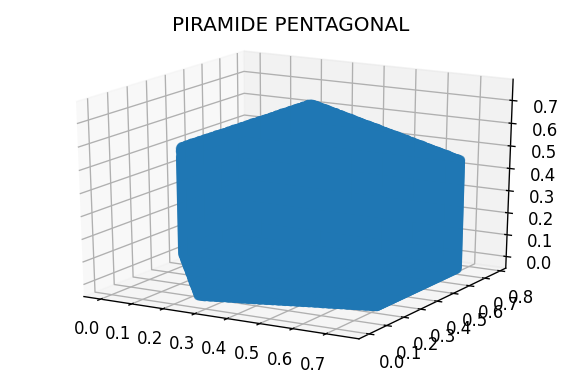

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('PIRAMIDE PENTAGONAL')
ax.scatter(x2,y2,z2)
ax.view_init(elev=20)

In [ ]:
N = coords2.shape[1]
Ix = sum(coords2[1]**2 + coords2[2]**2)/N
Iy = sum(coords2[0]**2 + coords2[2]**2)/N
Iz = sum(coords2[0]**2 + coords2[1]**2)/N
Ixy = sum(coords2[0]*coords2[1])/N
Iyz = sum(coords2[1]*coords2[2])/N
Ixz = sum(coords2[0]*coords2[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.31974929, 0.16454412, 0.11003529],
       [0.16454412, 0.34493086, 0.1019164 ],
       [0.11003529, 0.1019164 , 0.43290567]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.319749,0.164544,0.110035
1,0.164544,0.344931,0.101916
2,0.110035,0.101916,0.432906


Para la pirámide pentagonal se obtuvo (con los ejes coordenados mostrados en la figura):

$$I_{x} \approx I_{y} \neq I_{z}$$


<CENTER><h1>4. CUBO

In [ ]:
coords3 = np.loadtxt('cube_150x150x150.txt', unpack=True, delimiter=',', dtype=int)
coords3[[1, 2]] = coords3[[2, 1]]
coords3 = coords3/max(coords3.ravel())
x3,y3,z3  = coords3[0],coords3[1],coords3[2] 
#coords = x,y,z


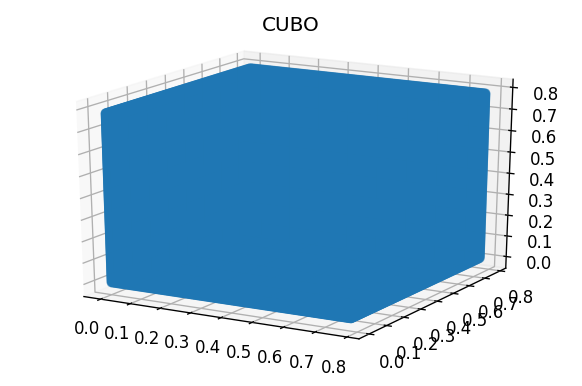

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('CUBO')
ax.scatter(x3,y3,z3)
ax.view_init(elev=20)

In [ ]:
N = coords3.shape[1]
Ix = sum(coords3[1]**2 + coords3[2]**2)/N
Iy = sum(coords3[0]**2 + coords3[2]**2)/N
Iz = sum(coords3[0]**2 + coords3[1]**2)/N
Ixy = sum(coords3[0]*coords3[1])/N
Iyz = sum(coords3[1]*coords3[2])/N
Ixz = sum(coords3[0]*coords3[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.47333518, 0.15214084, 0.15214084],
       [0.15214084, 0.47333518, 0.15214084],
       [0.15214084, 0.15214084, 0.47333518]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.473335,0.152141,0.152141
1,0.152141,0.473335,0.152141
2,0.152141,0.152141,0.473335


Para el cubo se obtuvo númericamente:

$$I_{x} = I_{y} = I_{z}$$

que nos dice que el cuerpo es una _peonza esférica_.

<CENTER><h1>5. CUBO ROMO

In [ ]:
coords4 = np.loadtxt('snub_cube_150x150x150.txt', unpack=True, delimiter=',', dtype=int)
coords4[[1, 2]] = coords4[[2, 1]]
coords4 = coords4/max(coords4.ravel())
x4,y4,z4  = coords4[0],coords4[1],coords4[2] 
#coords = x,y,z


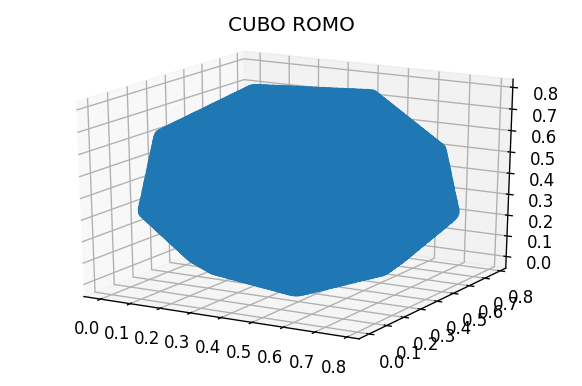

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('CUBO ROMO')
ax.scatter(x4,y4,z4)
ax.view_init(elev=20)

In [ ]:
N = coords4.shape[1]
Ix = sum(coords4[1]**2 + coords4[2]**2)/N
Iy = sum(coords4[0]**2 + coords4[2]**2)/N
Iz = sum(coords4[0]**2 + coords4[1]**2)/N
Ixy = sum(coords4[0]*coords4[1])/N
Iyz = sum(coords4[1]*coords4[2])/N
Ixz = sum(coords4[0]*coords4[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.42438202, 0.15214071, 0.15214071],
       [0.15214071, 0.42438202, 0.15214071],
       [0.15214071, 0.15214071, 0.42438202]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.424382,0.152141,0.152141
1,0.152141,0.424382,0.152141
2,0.152141,0.152141,0.424382


Igualmente que el cubo se obtuvo que el cuerpo rígido (cubo romo) es una _peonza esférica_.

<CENTER><h1>6. CUBO RUPERTS

In [ ]:
coords5 = np.loadtxt('prince_ruperts_cube_150x150x150.txt', unpack=True, delimiter=',', dtype=int)
coords5[[1, 2]] = coords5[[2, 1]]
coords5 = coords5/max(coords5.ravel())
x5,y5,z5  = coords5[0],coords5[1],coords5[2] 
#coords = x,y,z


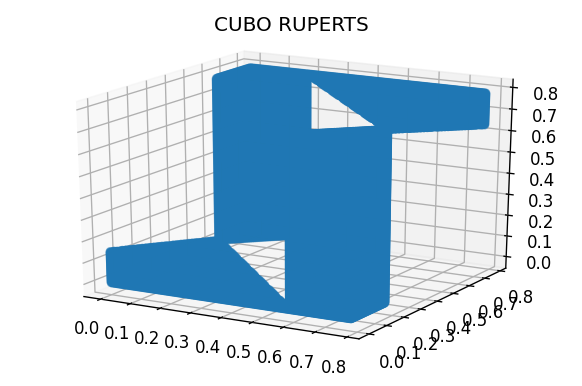

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('CUBO RUPERTS')
ax.scatter(x5,y5,z5)
ax.view_init(elev=20)

In [ ]:
N = coords5.shape[1]
Ix = sum(coords5[1]**2 + coords5[2]**2)/N
Iy = sum(coords5[0]**2 + coords5[2]**2)/N
Iz = sum(coords5[0]**2 + coords5[1]**2)/N
Ixy = sum(coords5[0]*coords5[1])/N
Iyz = sum(coords5[1]*coords5[2])/N
Ixz = sum(coords5[0]*coords5[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.48676562, 0.11389887, 0.1874419 ],
       [0.11389887, 0.48676562, 0.1874419 ],
       [0.1874419 , 0.1874419 , 0.48513064]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.486766,0.113899,0.187442
1,0.113899,0.486766,0.187442
2,0.187442,0.187442,0.485131


<CENTER><h1>7. TETRAEDRO

In [ ]:
coords6 = np.loadtxt('tetraedro_3d_144x125x150.txt', unpack=True, delimiter=',', dtype=int)
coords6[[1, 2]] = coords6[[2, 1]]
coords6 = coords6/max(coords6.ravel())
x6,y6,z6  = coords6[0],coords6[1],coords6[2] 
#coords = x,y,z


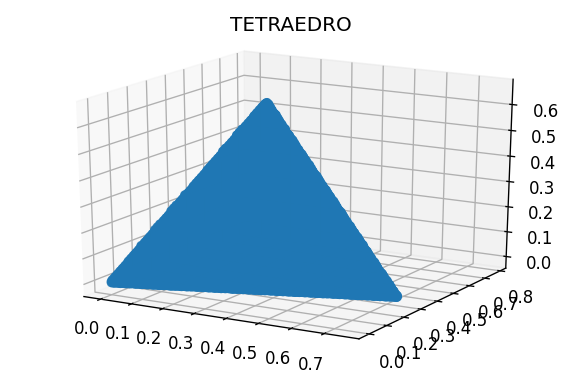

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('TETRAEDRO')
ax.scatter(x6,y6,z6)
ax.view_init(elev=20)

In [ ]:
N = coords6.shape[1]
Ix = sum(coords6[1]**2 + coords6[2]**2)/N
Iy = sum(coords6[0]**2 + coords6[2]**2)/N
Iz = sum(coords6[0]**2 + coords6[1]**2)/N
Ixy = sum(coords6[0]*coords6[1])/N
Iyz = sum(coords6[1]*coords6[2])/N
Ixz = sum(coords6[0]*coords6[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.19520118, 0.09986395, 0.04527802],
       [0.09986395, 0.16221081, 0.05341117],
       [0.04527802, 0.05341117, 0.25578619]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.195201,0.099864,0.045278
1,0.099864,0.162211,0.053411
2,0.045278,0.053411,0.255786


Para el tetraedro se obtuvo lo siguiente:

$$I_{x} \neq I_{y} \neq I_{z}$$

obteniendo que este cuerpo es una _peonza asimétrica_

<CENTER><h1>8. CILINDRO

In [ ]:
coords7 = np.loadtxt('cilindro_3d_113x150x113.txt', unpack=True, delimiter=',', dtype=int)
coords7[[1, 2]] = coords7[[2, 1]]
coords7 = coords7/max(coords7.ravel())
x7,y7,z7  = coords7[0],coords7[1],coords7[2] 
#coords = x,y,z


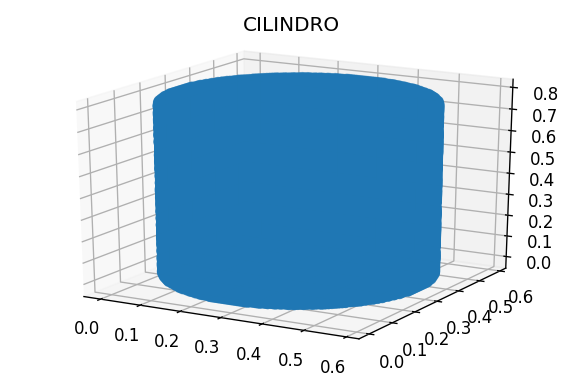

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('CILINDRO')
ax.scatter(x7,y7,z7)
ax.view_init(elev=20)

In [ ]:
N = coords7.shape[1]
Ix = sum(coords7[1]**2 + coords7[2]**2)/N
Iy = sum(coords7[0]**2 + coords7[2]**2)/N
Iz = sum(coords7[0]**2 + coords7[1]**2)/N
Ixy = sum(coords7[0]*coords7[1])/N
Iyz = sum(coords7[1]*coords7[2])/N
Ixz = sum(coords7[0]*coords7[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.35586587, 0.08597706, 0.11438032],
       [0.08597706, 0.35590219, 0.11436078],
       [0.11438032, 0.11436078, 0.2462096 ]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.355866,0.085977,0.114380
1,0.085977,0.355902,0.114361
2,0.114380,0.114361,0.246210


Para el cilindro se obtuvo que es una _peonza simétrica_ ya que:

$$I_{x} \approx I_{y} \neq I_{z}$$

<CENTER><h1>9. CONO

In [ ]:
coords8 = np.loadtxt('cono_3d_105x150x105.txt', unpack=True, delimiter=',', dtype=int)
coords8[[1, 2]] = coords8[[2, 1]]
coords8 = coords8/max(coords8.ravel())
x8,y8,z8  = coords8[0],coords8[1],coords8[2] 
#coords = x,y,z


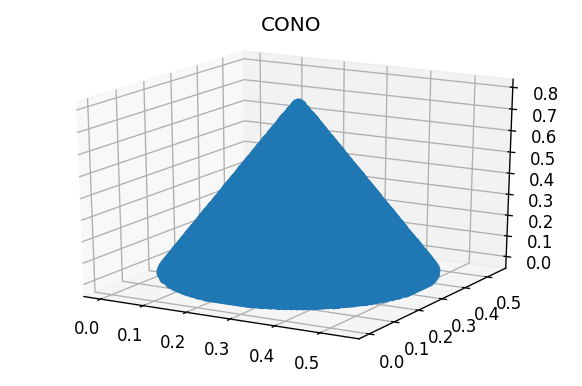

In [ ]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot(projection='3d')
plt.title('CONO')
ax.scatter(x8,y8,z8)
ax.view_init(elev=20)

In [ ]:
N = coords8.shape[1]
Ix = sum(coords8[1]**2 + coords8[2]**2)/N
Iy = sum(coords8[0]**2 + coords8[2]**2)/N
Iz = sum(coords8[0]**2 + coords8[1]**2)/N
Ixy = sum(coords8[0]*coords8[1])/N
Iyz = sum(coords8[1]*coords8[2])/N
Ixz = sum(coords8[0]*coords8[2])/N

In [ ]:
I = np.array([[Ix, Ixy, Ixz],[Ixy, Iy, Iyz],[Ixz, Iyz, Iz]])
I

array([[0.16756622, 0.07412303, 0.05155342],
       [0.07412303, 0.16756466, 0.05155342],
       [0.05155342, 0.05155342, 0.18601602]])

In [ ]:
pd.DataFrame(I).style.background_gradient(cmap='coolwarm', axis=None)


,0,1,2
0,0.167566,0.074123,0.051553
1,0.074123,0.167565,0.051553
2,0.051553,0.051553,0.186016


Para el cono se obtuvo que dos de los momentos de inercia son iguales y disntos al otro, por tanto diciendo que es una _peonza simétrica_

<h2>Referencias

$[1]$ L.D. Landau, E.M. Lifshitz. Mecánica. Volumen 1. Segunda edición. 1965